In [2]:
import json


with open("mt5_evaluation_results_raw.json", "r") as f:
    mt5_raw = json.load(f)

with open("mt5_evaluation_results_finetune.json", "r") as f:
    mt5_finetuned = json.load(f)
    
with open("qwen_evaluation_results_raw.json", "r") as f:
    qwen_raw = json.load(f)
    
with open("qwen_evaluation_results_finetune.json", "r") as f:
    qwen_finetuned = json.load(f)
    
with open("t5_evaluation_results_raw.json", "r") as f:
    t5_raw = json.load(f)

with open("t5_evaluation_results_finetune.json", "r") as f:
    t5_finetuned = json.load(f)



In [3]:
def format_scores(raw_score):
    return {
        "rouge1": raw_score["rouge"]["rouge1"],
        "rouge2": raw_score["rouge"]["rouge2"],
        "rougeL": raw_score["rouge"]["rougeL"],
        "rougeLsum": raw_score["rouge"]["rougeLsum"],
        "bert_Precision": raw_score["bert"]["Precision"],
        "bert_Recall": raw_score["bert"]["Recall"],
        "bert_F1": raw_score["bert"]["F1"]
    }

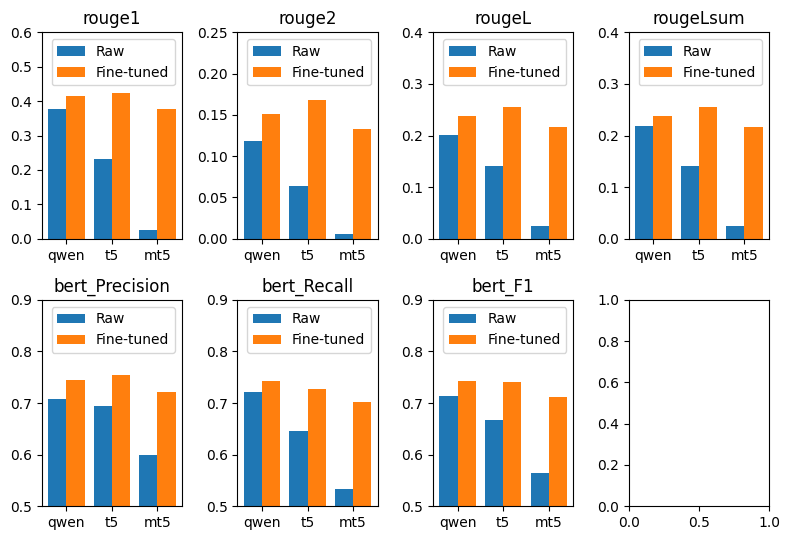

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data for 3 models, each having scores before and after fine-tuning
models = ['qwen', "t5", "mt5"]



scores_before = [
    format_scores(qwen_raw),
    format_scores(t5_raw),
    format_scores(mt5_raw)
]
scores_after = [
    format_scores(qwen_finetuned),
    format_scores(t5_finetuned),
    format_scores(mt5_finetuned)
]

# Extracting score names
score_names = list(scores_before[0].keys())

# Setting up the figure
fig, axes = plt.subplots(2, 4, figsize=(8, 5.5), sharey=False)
coords = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2)]
axes = [axes[coord[0], coord[1]] for coord in coords]


# Colors for before and after fine-tuning
colors = ["#1f77b4", "#ff7f0e"]
lims = [(.0, .6), (0, 0.25), (.0, 0.4),(0, 0.4), (0.5, 0.9),(0.5, 0.9),(0.5, 0.9)]
for i, score in enumerate(score_names):
    
    before_values = [model[score] for model in scores_before]
    after_values = [model[score] for model in scores_after]
    
    
    x = np.arange(len(models))
    
    ax = axes[i]
    ax.bar(x - 0.2, before_values, width=0.4, label="Raw", color=colors[0])
    ax.bar(x + 0.2, after_values, width=0.4, label="Fine-tuned", color=colors[1])
    
    ax.set_title(score)
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_ylim(lims[i][0], lims[i][1])  
    ax.legend()

plt.tight_layout()
plt.show()
